# Regresión Lineal Múltiple
Los modelos lineales son una de las herramientas más importantes del análisis cuantitativo. Los utilizamos cuando queremos predecir –o explicar– una variable dependiente a partir de una o más variables independientes. El uso mismo de la terminología de variables dependientes e independientes nos da una pista del abordaje: el ajuste de modelos lineales busca encontrar una función –en el sentido matemático– que nos permite expresar a una variable a partir de otras.

### Autores
   * Efrén Jiménez

## Análisis del Problema
El desempeño de un automóvil se puede medir de diferentes formas. Algunas comunes son la cantidad de caballos de fuerza y el rendimiento del mismo, que se puede resumir en cuantas millas puede recorrer el automóvil por cada galón de combustible que consume. Para los clientes, potenciales compradores de un automóvil, este rendimiento es importante pues puede ayudar a tomar una decisión con respecto a cuál automóvil comprar (si, por ejemplo, el cliente quiere un auto que rinda por muchas millas y pueda economizar en la compra de combustible).

Desde este punto de vista, tanto a clientes como a fabricadores de automóviles, les conviene entender cuál es la relación entre diferentes características del automóvil y su rendimiento, pues el conocer estas relaciones les puede ayudar a inferir cuál va a ser la eficiencia del vehículo a partir de ver los valores de otras características. Para fabricantes, puede ser importante conocer estas relaciones para saber cómo hacer cada modelo más eficiente con respecto al anterior.

## Entendimiento de los Datos

Con el fin de analizar y tratar de estimar las millas por galón de diferentes modelos de automóviles, se trabajó con un conjunto de datos que contiene 398 observaciones y 9 variables:

- mpg (millas por galón): numérica, con un rango de 9 a 46.60.
- cyl (cilindraje): categórica ordinal, con valores posibles de 3, 4, 5, 6 y 8.
- disp (desplazamiento): numérica, con un rango de 68 a 455.
- hp (caballos de fuerza): numérica, con un rango de 46 a 230 y 6 valores faltantes.
- weight (peso): numérica, con un rango de 1613 a 5140.
- acc (aceleración): numérica, con un rango de 8 a 24.80.
- model year (año): categórica, con 13 valores diferentes representando el año del automóvil.
- origin (origen): categórica, 3 valores posibles: 1, 2, 3.
- model name (nombre del modelo): categórica, con 305 posibles valores.

## Exploración de los Datos

In [5]:
#librerías utilizadas
library(caTools)
library(ggplot2)
#Evitar mostrar warning messages
options(warn=-1)

#establezca el directorio de trabajo
#En caso de que el sitio este en algún directorio de la maquina
#setwd('auto-mpg.txt')

#cargue el archivo a una variable que se llame autos usando la función read.table
autos <- read.csv('auto-mpg.txt', header = F, na.strings = '?')
autos <- data.frame(do.call('rbind', strsplit(as.character(autos$V1),'  ',fixed=TRUE)))

colnames(autos) <- c('mpg', 'cyl', 'disp', 'hp', 'weight', 'acc', 'model.year', 
                     'origin', 'model.name')
autos<-autos[,1:6]
#cambiar las variables que corresponden a numéricas
autos$mpg <- as.numeric(as.character(autos$mpg))
autos$disp <- as.numeric(as.character(autos$disp))
autos$hp <- as.numeric(as.character(autos$hp))
autos$weight <- as.numeric(as.character(autos$weight))
autos$acc <- as.numeric(as.character(autos$acc))

#Utilice la función str() para ver la estructura del conjunto de datos:
str(autos)

#Dividir el conjunto de datos en uno de entrenamiento y otro de pruebas:
set.seed(1376)
splt <- sample.split(autos$mpg, SplitRatio = 0.7)
autos.entrenamiento <- autos[splt, ]
autos.prueba <- autos[!splt, ]


'data.frame':	398 obs. of  6 variables:
 $ mpg   : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cyl   : Factor w/ 5 levels " 3"," 4"," 5",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ disp  : num  307 350 318 304 302 429 454 440 455 390 ...
 $ hp    : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight: num  3504 3693 3436 3433 3449 ...
 $ acc   : num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...


>Es importante siempre validar los rangos de los conjuntos de datos creados, para evitar caer en extrapolación:

In [6]:
print(".................................Entrenamiento..................................")
summary(autos.entrenamiento)
print(".................................Pruebas........................................")
summary(autos.prueba)

[1] ".................................Entrenamiento.................................."


      mpg        cyl           disp             hp            weight    
 Min.   : 9.00    3:  3   Min.   : 70.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.50    4:155   1st Qu.: 98.0   1st Qu.: 75.0   1st Qu.:2220  
 Median :23.00    5:  2   Median :144.0   Median : 92.0   Median :2774  
 Mean   :23.88    6: 63   Mean   :188.7   Mean   :103.4   Mean   :2943  
 3rd Qu.:29.80    8: 70   3rd Qu.:250.0   3rd Qu.:120.5   3rd Qu.:3465  
 Max.   :46.60            Max.   :455.0   Max.   :230.0   Max.   :5140  
                                          NA's   :5                     
      acc       
 Min.   : 8.00  
 1st Qu.:13.90  
 Median :15.50  
 Mean   :15.65  
 3rd Qu.:17.30  
 Max.   :24.60  
                

[1] ".................................Pruebas........................................"


      mpg       cyl          disp             hp            weight    
 Min.   :10.0    3: 1   Min.   : 68.0   Min.   : 49.0   Min.   :1649  
 1st Qu.:16.5    4:49   1st Qu.:108.0   1st Qu.: 78.0   1st Qu.:2265  
 Median :21.5    5: 1   Median :199.0   Median : 96.5   Median :2945  
 Mean   :22.5    6:21   Mean   :206.7   Mean   :107.4   Mean   :3047  
 3rd Qu.:28.0    8:33   3rd Qu.:302.0   3rd Qu.:130.0   3rd Qu.:3725  
 Max.   :38.0           Max.   :455.0   Max.   :225.0   Max.   :4906  
                                        NA's   :1                     
      acc       
 Min.   : 8.50  
 1st Qu.:13.50  
 Median :15.10  
 Mean   :15.34  
 3rd Qu.:16.80  
 Max.   :24.80  
                

De acuerdo con los resúmenes anteriores, hay algunas observaciones en el conjunto de datos de prueba cuyo rango de las variables disp y weight se extiende más allá del rango en el conjunto de datos de entrenamiento, así que vamos a eliminar esas observaciones del conjunto de datos de prueba.

In [7]:
print("Eliminar datos fuera de rango")
autos.prueba <- autos.prueba[autos.prueba$weight >= 1649 & autos.prueba$disp >= 70, ]
print(".................................Entrenamiento..................................")
summary(autos.entrenamiento)
print(".................................Pruebas........................................")
summary(autos.prueba)

[1] "Eliminar datos fuera de rango"
[1] ".................................Entrenamiento.................................."


      mpg        cyl           disp             hp            weight    
 Min.   : 9.00    3:  3   Min.   : 70.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.50    4:155   1st Qu.: 98.0   1st Qu.: 75.0   1st Qu.:2220  
 Median :23.00    5:  2   Median :144.0   Median : 92.0   Median :2774  
 Mean   :23.88    6: 63   Mean   :188.7   Mean   :103.4   Mean   :2943  
 3rd Qu.:29.80    8: 70   3rd Qu.:250.0   3rd Qu.:120.5   3rd Qu.:3465  
 Max.   :46.60            Max.   :455.0   Max.   :230.0   Max.   :5140  
                                          NA's   :5                     
      acc       
 Min.   : 8.00  
 1st Qu.:13.90  
 Median :15.50  
 Mean   :15.65  
 3rd Qu.:17.30  
 Max.   :24.60  
                

[1] ".................................Pruebas........................................"


      mpg        cyl          disp             hp          weight    
 Min.   :10.00    3: 1   Min.   : 71.0   Min.   : 52   Min.   :1649  
 1st Qu.:16.38    4:48   1st Qu.:111.0   1st Qu.: 79   1st Qu.:2275  
 Median :21.25    5: 1   Median :199.5   Median : 97   Median :2945  
 Mean   :22.43    6:21   Mean   :208.0   Mean   :108   Mean   :3059  
 3rd Qu.:27.40    8:33   3rd Qu.:302.5   3rd Qu.:130   3rd Qu.:3726  
 Max.   :38.00           Max.   :455.0   Max.   :225   Max.   :4906  
                                         NA's   :1                   
      acc       
 Min.   : 8.50  
 1st Qu.:13.50  
 Median :15.10  
 Mean   :15.30  
 3rd Qu.:16.65  
 Max.   :24.80  
                

En total, se eliminaron 2 observaciones.

Para trabajar con regresiones lineales, es importante trabajar solo con variables cuantitativas y estudiar las relaciones que hay entre ellas. Con esto en mente, podemos comenzar nuestra exploración creando gráficos de dispersión para ver cuál es la relación entre nuestra variable de interés (mpg) y el resto de las variables cuantitativas:

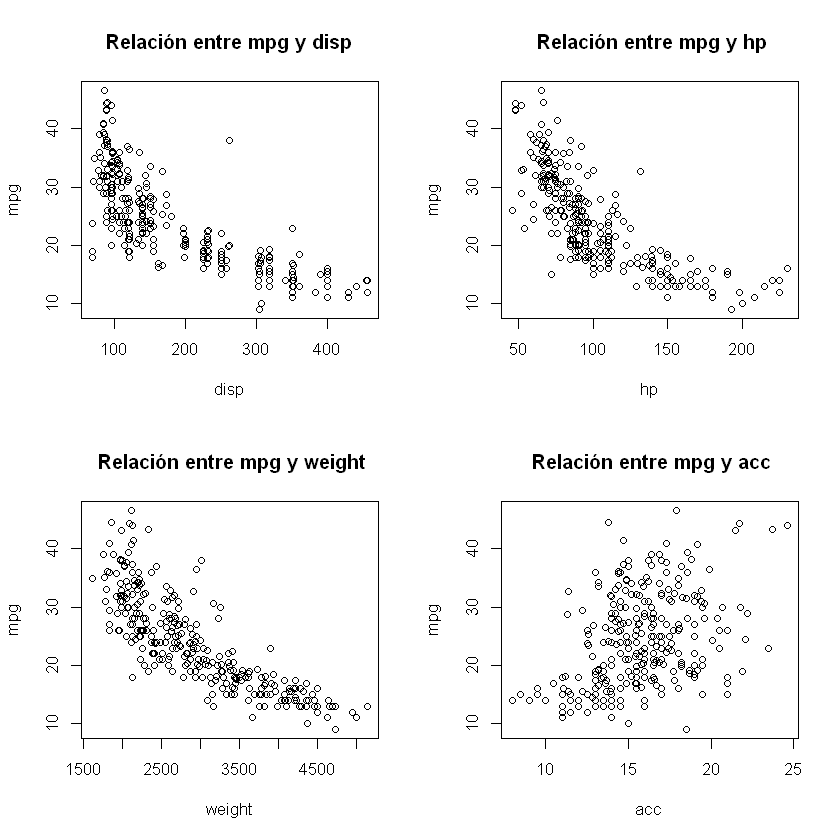

In [8]:
par(mfrow = c(2,2)) #crear una cuadrícula de 2 columnas y 2 hileras para ver cuatro gráficos.

plot(x = autos.entrenamiento$disp, y = autos.entrenamiento$mpg, main = 'Relación entre mpg y disp', ylab = 'mpg', xlab = 'disp')
plot(x = autos.entrenamiento$hp, y = autos.entrenamiento$mpg, main = ' Relación entre mpg y hp', ylab = 'mpg', xlab = 'hp')
plot(x = autos.entrenamiento$weight, y = autos.entrenamiento$mpg, main = ' Relación entre mpg y weight', ylab = 'mpg', xlab = 'weight')
plot(x = autos.entrenamiento$acc, y = autos.entrenamiento$mpg, main = ' Relación entre mpg y acc', ylab = 'mpg', xlab = 'acc')

En los gráficos creados anteriormente, podemos ver como si existe algún tipo de relación, aunque no sea exactamente lineal, entre mpg y las otras cuatro variables cuantitativas. De estas cuatro variables, la que parece tener menor relación es la variable acc con la variable mpg.

También es importante visualizar la relación entre las diferentes variables predictoras, para lo cual podemos crear una matriz de gráficos de dispersión:

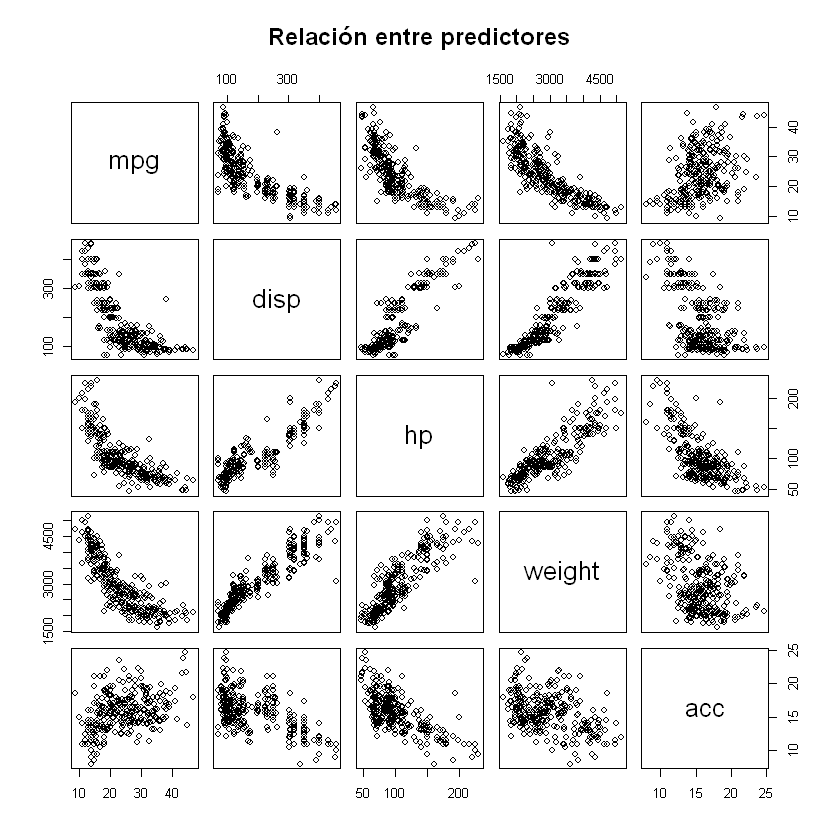

In [9]:
par(mfrow = c(1,1)) #volver a solo un gráfico por visualización.

pairs(autos.entrenamiento[!is.na(autos$hp), c(1,3,4,5,6)], main = 'Relación entre predictores')

La información del gráfico anterior podemos complementarla con una matriz de correlación:

In [10]:
cor(autos.entrenamiento[!is.na(autos.entrenamiento$hp),c(1,3,4,5,6)])

,mpg,disp,hp,weight,acc
mpg,1.0000000,-0.7933915,-0.7728878,-0.8228879,0.4175971
disp,-0.7933915,1.0000000,0.8970014,0.9294049,-0.5490654
hp,-0.7728878,0.8970014,1.0000000,0.8613336,-0.6944240
weight,-0.8228879,0.9294049,0.8613336,1.0000000,-0.4197444
acc,0.4175971,-0.5490654,-0.6944240,-0.4197444,1.0000000


Como pudimos apreciar en la matriz de gráficos de dispersión, y confirmar con la matriz de correlación, hay una correlación significativa entre los variables hp y disp, disp y weight y hp y weight. La unica variable que no tiene una correlación absoluta mayor a 0.75 es acc. Dado esto, debemos escoger una variable entre hp, disp y weight, para lo cual podemos crear una matriz de correlación entre esas tres variables y mpg para ver cuál tiene una correlación mayor con mpg:

In [11]:
cor(autos.entrenamiento[!is.na(autos.entrenamiento$hp),c(1,3,4,5,6)])


,mpg,disp,hp,weight,acc
mpg,1.0000000,-0.7933915,-0.7728878,-0.8228879,0.4175971
disp,-0.7933915,1.0000000,0.8970014,0.9294049,-0.5490654
hp,-0.7728878,0.8970014,1.0000000,0.8613336,-0.6944240
weight,-0.8228879,0.9294049,0.8613336,1.0000000,-0.4197444
acc,0.4175971,-0.5490654,-0.6944240,-0.4197444,1.0000000


Basándonos en la correlación absoluta, se va a escoger la variable weight para ser incluida en el modelo.

## Modelo de Minería de Datos

Una vez seleccionadas las variables para incluir en el modelo de regresión, se procede a crearlo:

In [20]:
reg.mpg <- lm(mpg ~ hp +weight , data = autos.entrenamiento)

summary(reg.mpg)


Call:
lm(formula = mpg ~ hp + weight, data = autos.entrenamiento)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.3702  -2.9224  -0.4384   2.3626  15.8358 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 46.528888   0.981334  47.414  < 2e-16 ***
hp          -0.052484   0.013650  -3.845 0.000149 ***
weight      -0.005855   0.000621  -9.427  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.461 on 285 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.6931,	Adjusted R-squared:  0.6909 
F-statistic: 321.8 on 2 and 285 DF,  p-value: < 2.2e-16


* Call: y muestra la formula con la que obtuvimos el modelo. Es útil para evitar confusiones, especialmente si estamos comparando varios modelos a la vez. Podemos saber exactamente a qué variables dependientes e independientes corresponde el sumario.
* Residuals: y nos da 5 estadísticos sobre la distribución de los residuos del modelo: valores mínimos, 1er, 2do y 3er cuartil y valor máximo. La media de los residuos siempre es cero, así que es un parámetro de referencia que no aparece en el sumario, pero que nos resulta útil. Si los residuos se distribuyen conforme a una distribución normal deberíamos esperar que la mediana sea 0 o muy cerca de 0, y que el 1er y 3er cuartil sean simétricos. Lo mismo para lo valores mínimos o máximos. Si hay desviaciones notables de media y mediana y no hay simetría entre cuartiles es muy probable que no estemos cumpliendo con algunos de los supuestos de los modelos lineales.
* Coefficients: y muestra los coeficientes estimados por el modelo, es decir, los parámetros ocultos β0 y β1 de la ecuación 1. Estas son la ordenada al origen (Intercept) y las pendientes estimadas para cada variable.
* Residual se registra el error estandar para la estimación de cada variable, al que podemos interpretar como el promedio de los residuos. A partir del coeficiente estimado y el error estándar se computa un valor t, un estadístico de la divergencia entre el estimado que produce el modelo y un estimado hipotético con valor 0. Cuanto más alto es el valor t mayor la divergencia entre los coeficientes del modelo y el coeficiente igual a cero. 
* El p-value de la prueba de hipótesis del estadístico t, que indica la probabilidad de obtener un estimado como el que obtuvimos si el coeficiente real fuera 0. Si la probabilidad de este evento es muy baja podemos rechazar la hipótesis de nulidad según la cuál el verdadero estimado es cero. Esto no significa que nuestro modelo sea verdadero, simplemente que es poco verosímil que obtuviéramos estos estimados siendo verdadero que la pendiente es 0. Si el p-value es alto (digamos, mayor que 0.05) no podemos rechazar la hipótesis de nulidad y deberíamos tratar a nuestro estimado como si fuera 0: la pendiente es horizontal, no hay diferencias significativas en los valores de y a medida que varía el valor de x.
* El error estándar de los residuos y los valores de R2, múltiple y ajustado. El R^2 de 0.6931 indica el modelo explica un 69.31% de la varianza de la variable dependiente. El resto de la varianza puede atribuirse al azar o a otras variables que no hemos incorporado al modelo.
*El estadístico F y el p-value correspondiente. El estadístico F considera a la varianza explicada y la no explicada y es la base de una prueba de hipótesis en la que contrasta a nuestro modelo con uno hipotético en el que las variables no tienen efectos, es decir, con todos los coeficientes iguales a 0. Si el p-value del estadístico F es menor a cierto criterio –usualmente menor que 0.05– podemos rechazar esta hipótesis de nulidad.

En el resumen del modelo, podemos ver que ambas variables son significativas y que el modelo creado explica alrededor de un 69% de la variación en la variable de respuesta (mpg). Asimismo, podemos ver que el modelo es mejor que un modelo sin variables. Con este modelo, procedemos a hacer las predicciones sobre el conjunto de datos de prueba.

In [14]:
autos.prueba$Prediccion <- predict(reg.mpg, newdata = autos.prueba)

## Evaluación

Para determinar qué tan bueno es el modelo, vamos a calcular dos métricas: primero la raíz cuadrada del promedio de los errores cuadrados (RMSE):

In [15]:
sqrt(mean((autos.prueba$mpg - autos.prueba$Prediccion)^2,na.rm=TRUE))

[1] 3.608346

Finalmente, procedemos a analizar la distribución de los residuos:

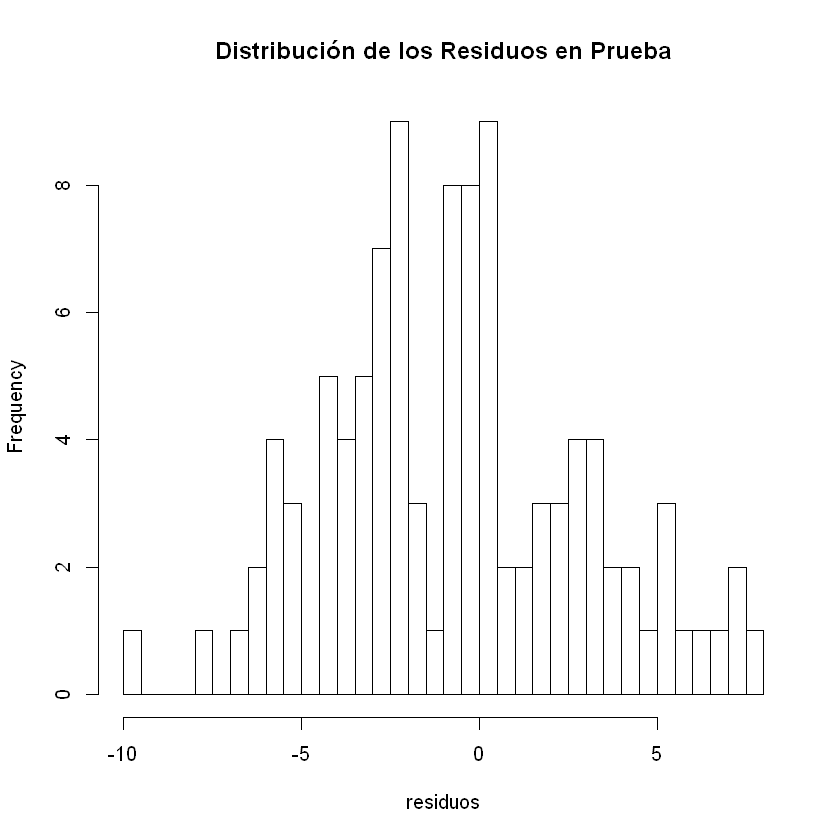

In [16]:
hist(autos.prueba$mpg - autos.prueba$Prediccion, 
     breaks = 50,
     main = 'Distribución de los Residuos en Prueba',
     xlab = 'residuos')


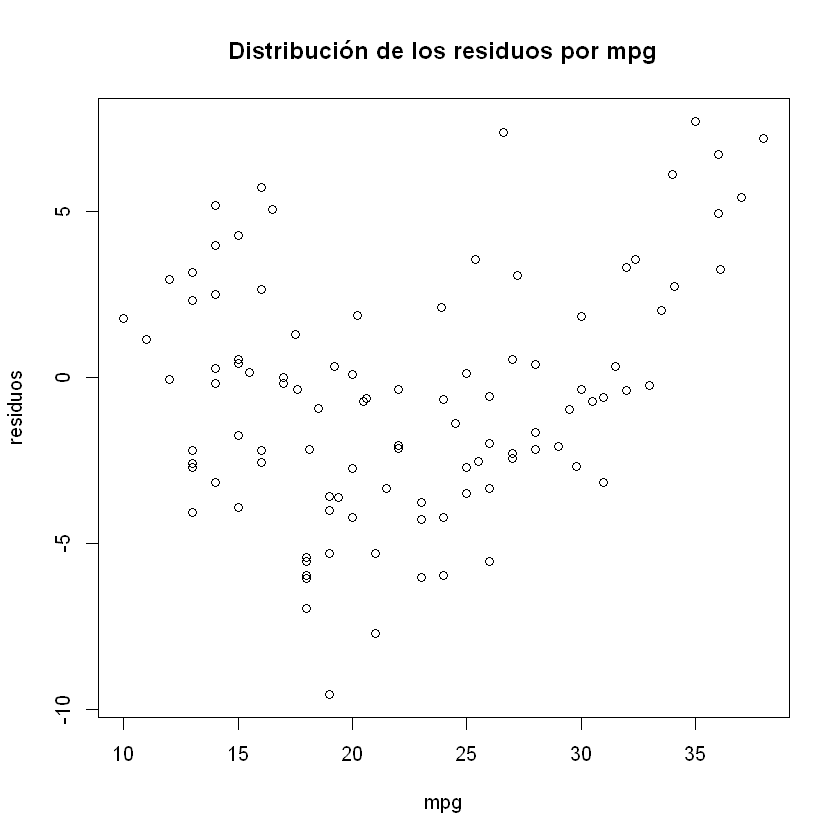

In [17]:
plot(y = autos.prueba$mpg - autos.prueba$Prediccion,
     x = autos.prueba$mpg,
     main = 'Distribución de los residuos por mpg',
     xlab = 'mpg',
     ylab = 'residuos')

## Resultados
De acuerdo con la evaluación hecha, el modelo inicia con muy buenos números: puede explicar cerca de un 70% de la variación de la variable mpg en el conjunto de datos de prueba, y el error promedio es de alrededor de 3 mpg para arriba o para abajo. 

http://halweb.uc3m.es/esp/Personal/personas/mwiper/docencia/Spanish/Introduction_to_Statistics/intro_regress2.pdf

In [ ]:
reg.mpg <- lm(log(mpg) ~ log(weight)+log(hp) , data = autos.entrenamiento)

summary(reg.mpg)